# Autoencoder-Based Anomaly Detection

This notebook demonstrates how to identify anomalies using autoencoders.

## Import necessary libraries

In [1]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

## Define colors and generate dataset

In [2]:
# Set random seed for reproducibility.
np.random.seed(42)

# Define the colors to be used in the plot.
colors = [
    "#2580B7", # Blue
    "#C03B26", # Red
    "#44546A", # Gray
]

# Generate 100 samples for the cluster with some outliers.
cluster_samples = np.random.normal(loc=0.0, scale=1.0, size=(100, 2))
outliers = np.random.uniform(low=-4, high=4, size=(10, 2))
data = np.vstack((cluster_samples, outliers))

## Define and Train Autoencoder

In [3]:
# Define the autoencoder model.
input_dim = data.shape[1]
ENCODING_DIM = 2

input_layer = Input(shape=(input_dim,))
encoder = Dense(ENCODING_DIM, activation="relu")(input_layer)
decoder = Dense(input_dim, activation="sigmoid")(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer=Adam(learning_rate=0.01), loss="mse")

# Train the autoencoder.
autoencoder.fit(
    data, data, epochs=100, batch_size=10, shuffle=True,
    validation_split=0.2, verbose=0
)

## Detect Anomalies

In [4]:
# Get the reconstruction error for each data point.
reconstructions = autoencoder.predict(data)
reconstruction_errors = np.mean(np.square(data - reconstructions), axis=1)

# Define a threshold for anomaly detection.
threshold = np.percentile(reconstruction_errors, 95)

# Identify anomalies.
anomalies = reconstruction_errors > threshold

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


## Visualization

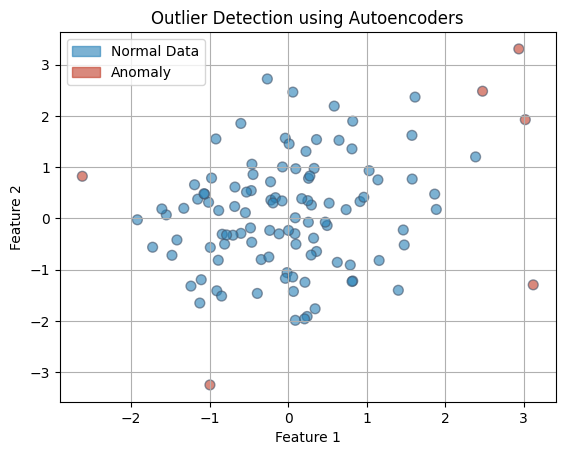

In [5]:
plt.scatter(
    data[:, 0], data[:, 1],
    c=np.where(anomalies, colors[1], colors[0]),
    s=50, edgecolor=colors[-1], alpha=0.6
)

# Custom legend for clarity.
initial_patch = mpatches.Patch(color=colors[0], alpha=0.6, label="Normal Data")
final_patch = mpatches.Patch(color=colors[1], alpha=0.6, label="Anomaly")
plt.legend(
    handles=[initial_patch, final_patch]
)

plt.title("Outlier Detection using Autoencoders")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()